In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [7]:
# Load the dataset
file_path = '/content/HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

In [8]:
# Data Description
print("Dataset Overview:")
print(df.info())
print("\nData Sample:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLev

In [9]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

In [10]:
# Split the Data into Training and Testing Sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLev

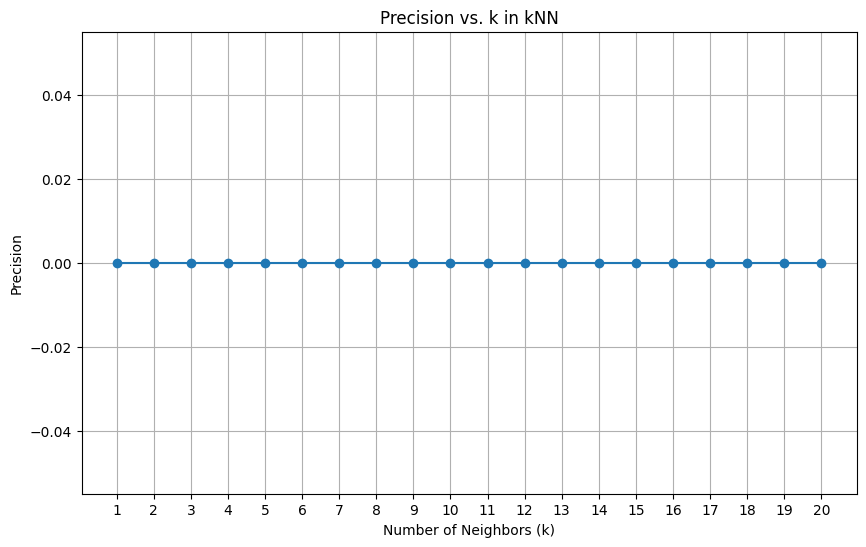

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/content/HR-Employee-Attrition.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)

# Data Description
print("Dataset Overview:")
print(df.info())
print("\nData Sample:")
print(df.head())

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('Attrition_Yes', axis=1)  # Assuming 'Attrition' is converted to 'Attrition_Yes'
y = df['Attrition_Yes']

# Split the Data into Training and Testing Sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: kNN Algorithm
def knn_model(X_train, y_train, X_test, y_test):
    k_values = range(1, 21)
    precisions = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)

        if '1' in report:
            precisions.append(report['1']['precision'])  # Precision for the positive class
        else:
            precisions.append(0)  # Handle cases where '1' is not present

    # Visualization of precision results
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, precisions, marker='o')
    plt.title('Precision vs. k in kNN')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Precision')
    plt.xticks(k_values)
    plt.grid()
    plt.show()

# Run kNN model
knn_model(X_train, y_train, X_test, y_test)

Linear Regression RMSE on Training Data: 0.3161


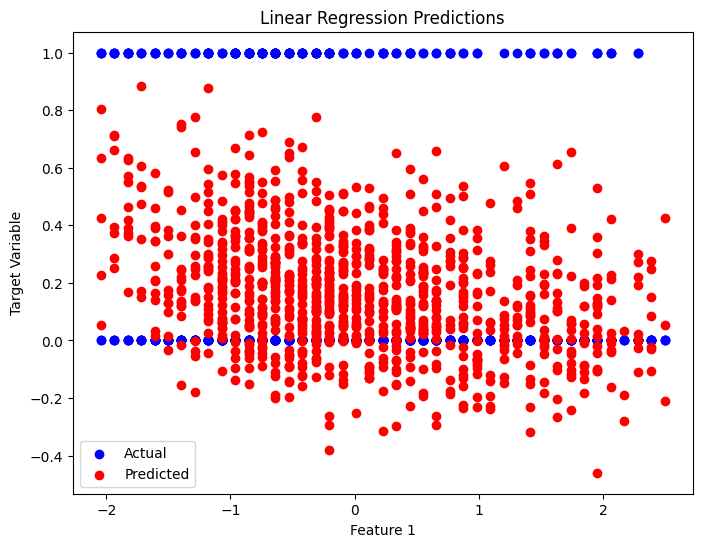

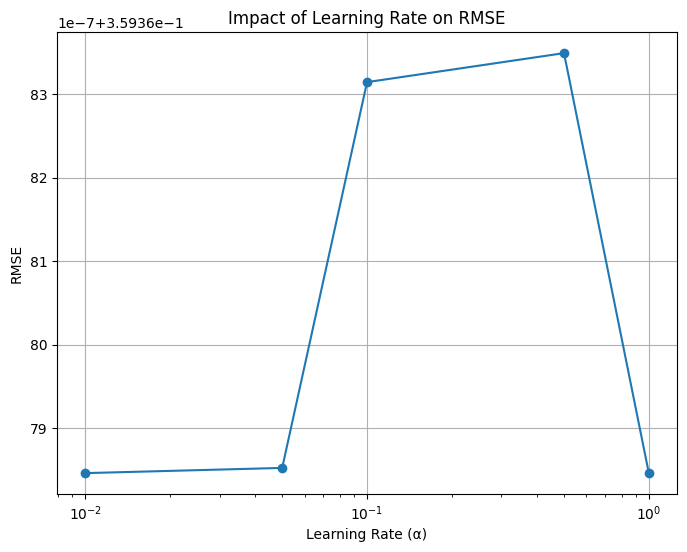


Logistic Regression Accuracy: 0.8707


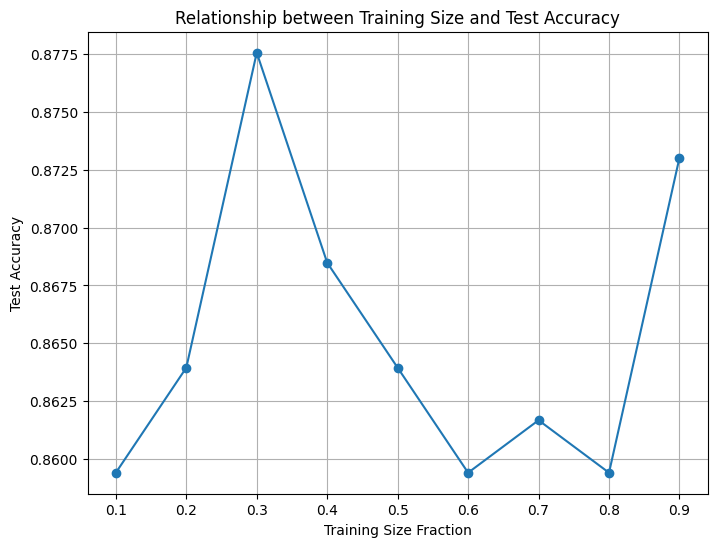

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Load the dataset
file_path = '/content/HR-Employee-Attrition.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)



# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('Attrition_Yes', axis=1)  # Assuming 'Attrition' is converted to 'Attrition_Yes'
y = df['Attrition_Yes']

# Split the Data into Training and Testing Sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 2: Linear and Logistic Regression
def regression_models(X_train, y_train, X_test, y_test):
    # Linear Regression for numerical predictions
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)

    # Predictions and RMSE
    y_train_pred = linear_reg.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    print(f"Linear Regression RMSE on Training Data: {rmse_train:.4f}")

    # Visualization of regression line (only for 2D)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:, 0], y_train, color='blue', label='Actual')
    plt.scatter(X_train[:, 0], y_train_pred, color='red', label='Predicted')
    plt.title('Linear Regression Predictions')
    plt.xlabel('Feature 1')  # Change to an appropriate feature name
    plt.ylabel('Target Variable')
    plt.legend()
    plt.show()

    # Analysis of learning rate impact on RMSE
    learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
    rmse_values = []

    for alpha in learning_rates:
        linear_reg = LinearRegression(fit_intercept=False)  # No intercept for simplicity
        linear_reg.fit(X_train, y_train, sample_weight=np.ones(len(y_train)) * alpha)
        y_train_pred = linear_reg.predict(X_train)
        rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_values.append(rmse)

    plt.figure(figsize=(8, 6))
    plt.plot(learning_rates, rmse_values, marker='o')
    plt.xscale('log')
    plt.title('Impact of Learning Rate on RMSE')
    plt.xlabel('Learning Rate (α)')
    plt.ylabel('RMSE')
    plt.grid()
    plt.show()

    # Logistic Regression for binary classification
    logistic_reg = LogisticRegression(max_iter=1000)
    logistic_reg.fit(X_train, y_train)
    y_pred = logistic_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")

    # Examine relationship between training size and test accuracy
    training_sizes = np.linspace(0.1, 0.9, 9)
    accuracies = []

    for size in training_sizes:
        X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
        logistic_reg = LogisticRegression(max_iter=1000)
        logistic_reg.fit(X_sub, y_sub)
        y_pred = logistic_reg.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    plt.figure(figsize=(8, 6))
    plt.plot(training_sizes, accuracies, marker='o')
    plt.title('Relationship between Training Size and Test Accuracy')
    plt.xlabel('Training Size Fraction')
    plt.ylabel('Test Accuracy')
    plt.grid()
    plt.show()

# Run regression models
regression_models(X_train, y_train, X_test, y_test)

C = 0.01: Precision = 0.8571, Recall = 0.0984
C = 0.1: Precision = 0.7143, Recall = 0.3279
C = 1: Precision = 0.6667, Recall = 0.3934
C = 10: Precision = 0.6486, Recall = 0.3934
C = 100: Precision = 0.6486, Recall = 0.3934


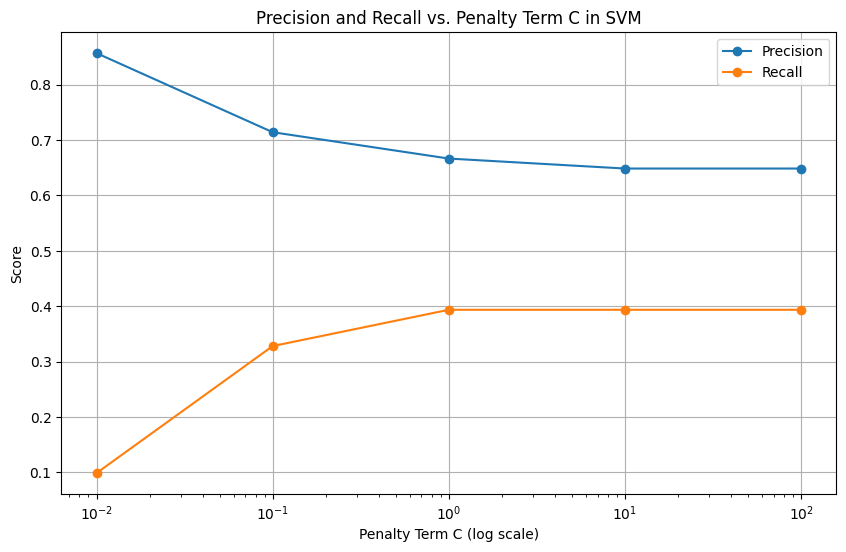

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score

# Load the dataset
file_path = '/content/HR-Employee-Attrition.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)


# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('Attrition_Yes', axis=1)  # Assuming 'Attrition' is converted to 'Attrition_Yes'
y = df['Attrition_Yes']

# Split the Data into Training and Testing Sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 3: Support Vector Machine (SVM) with Linear Kernel
def svm_model(X_train, y_train, X_test, y_test):
    # Investigate the effect of the penalty term C
    c_values = [0.01, 0.1, 1, 10, 100]
    precisions = []
    recalls = []

    for c in c_values:
        svm = SVC(kernel='linear', C=c)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        # Calculate precision and recall
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        precisions.append(precision)
        recalls.append(recall)

        print(f"C = {c}: Precision = {precision:.4f}, Recall = {recall:.4f}")

    # Visualization of Precision and Recall
    plt.figure(figsize=(10, 6))
    plt.plot(c_values, precisions, marker='o', label='Precision')
    plt.plot(c_values, recalls, marker='o', label='Recall')
    plt.xscale('log')
    plt.title('Precision and Recall vs. Penalty Term C in SVM')
    plt.xlabel('Penalty Term C (log scale)')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

# Run SVM model
svm_model(X_train, y_train, X_test, y_test)


Eigenvalues of the first 3 principal components:
[5.38979397 3.46270022 2.0916927 ]

Eigenvectors of the first 3 principal components:
Component 1: [ 2.60328470e-01 -4.75391597e-03  1.69148297e-04  7.46408662e-02
 -4.64946474e-21 -1.29485061e-02 -2.92120936e-03 -1.80826512e-02
  7.62073592e-03  3.81089021e-01 -7.65681425e-03  3.76139543e-01
  1.22825040e-02  6.55980530e-02 -4.30476085e-03  2.83312494e-03
  1.50559877e-02  0.00000000e+00  1.85481496e-02  3.73107101e-01
  1.74250451e-04  2.03031351e-02  3.40096295e-01  2.97681321e-01
  2.46220948e-01  2.74074419e-01 -1.32956455e-02  1.18995914e-02
 -5.34728369e-02  5.41492040e-02 -9.36011172e-03  4.60492118e-02
  1.09738488e-03 -3.20033551e-02 -9.61487437e-03 -4.73020035e-02
 -3.57027509e-02 -1.36649342e-01  2.26179026e-01  3.60935784e-02
  1.66750023e-01 -1.46949567e-01  6.64088802e-02 -1.03278591e-01
  4.67714826e-02 -6.00590938e-02 -1.61287630e-02]
Component 2: [-5.69235394e-02 -1.27558229e-02  4.94859170e-03  1.45940803e-02
 -5.4972

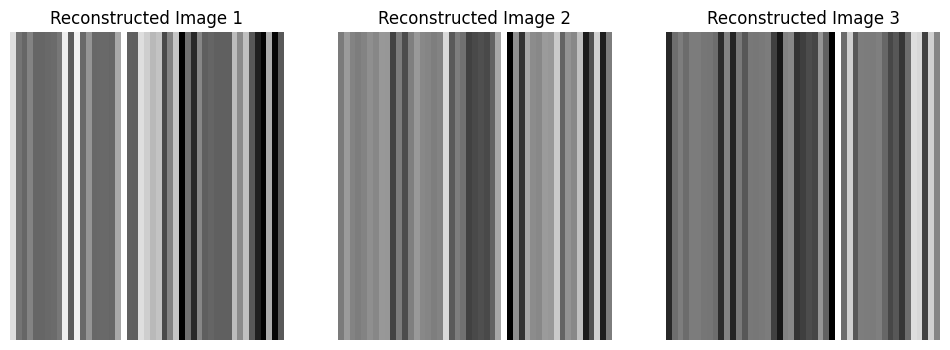

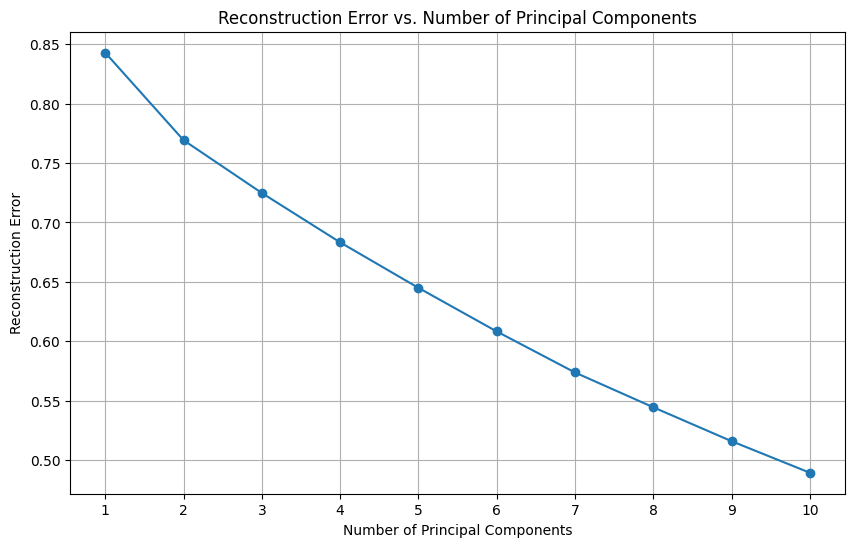

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/HR-Employee-Attrition.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)


# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('Attrition_Yes', axis=1)  # Assuming 'Attrition' is converted to 'Attrition_Yes'
y = df['Attrition_Yes']

# Split the Data into Training and Testing Sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 4: Principal Component Analysis (PCA)
def pca_model(X):
    pca = PCA(n_components=3)  # Extracting first 3 principal components

    # Fit and transform the data
    X_pca = pca.fit_transform(X)

    # Extract eigenvalues and eigenvectors
    eigenvalues = pca.explained_variance_
    eigenvectors = pca.components_

    print("\nEigenvalues of the first 3 principal components:")
    print(eigenvalues)

    print("\nEigenvectors of the first 3 principal components:")
    for i, ev in enumerate(eigenvectors):
        print(f"Component {i+1}: {ev}")

    # Visualization of reconstructed images with reduced principal components
    reconstructed_images = pca.inverse_transform(X_pca)

    # Plotting the first 3 reconstructed images
    plt.figure(figsize=(12, 4))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(reconstructed_images[i].reshape(1, -1), aspect='auto', cmap='gray')
        plt.title(f'Reconstructed Image {i + 1}')
        plt.axis('off')
    plt.show()

    # Analysis of the relationship between the number of principal components and reconstruction error
    components_range = range(1, 11)
    reconstruction_errors = []

    for n in components_range:
        pca = PCA(n_components=n)
        X_pca = pca.fit_transform(X)
        reconstructed = pca.inverse_transform(X_pca)
        error = np.mean((X - reconstructed) ** 2)
        reconstruction_errors.append(error)

    plt.figure(figsize=(10, 6))
    plt.plot(components_range, reconstruction_errors, marker='o')
    plt.title('Reconstruction Error vs. Number of Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Reconstruction Error')
    plt.xticks(components_range)
    plt.grid()
    plt.show()

# Run PCA model
pca_model(X_train)


kNN - Precision: 0.5200, Recall: 0.2131, Accuracy: 0.8639
SVM - Precision: 0.6667, Recall: 0.3934, Accuracy: 0.8889
Linear Regression - RMSE Train: 0.3161, RMSE Test: 0.3272
Logistic Regression - Precision: 0.5455, Recall: 0.3934, Accuracy: 0.8707
PCA + Logistic Regression - Precision: 0.7027, Recall: 0.4262, Accuracy: 0.8957


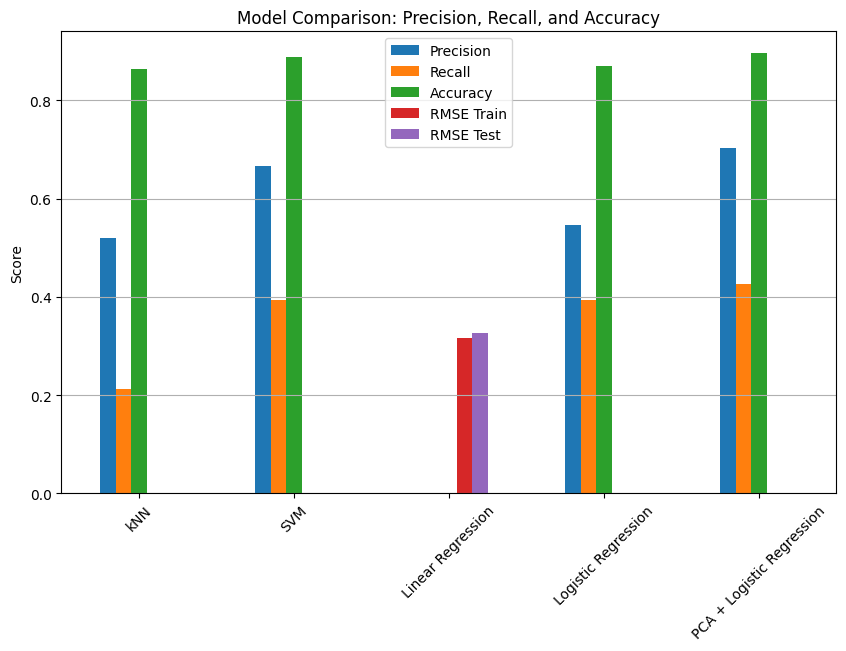

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the dataset
file_path = '/content/HR-Employee-Attrition.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)



# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target variable (y)
X = df.drop('Attrition_Yes', axis=1)  # Assuming 'Attrition' is converted to 'Attrition_Yes'
y = df['Attrition_Yes']

# Split the Data into Training and Testing Sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize results dictionary to store evaluation metrics
results = {}

# Model 1: kNN Algorithm
def knn_model(X_train_scaled, y_train_scaled):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train_scaled)
    y_pred = knn.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results['kNN'] = {'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}
    print(f"kNN - Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}")

# Model 2: Support Vector Machine (SVM)
def svm_model(X_train_scaled, y_train_scaled):
    svm = SVC(kernel='linear', C=1.0)
    svm.fit(X_train_scaled, y_train_scaled)
    y_pred = svm.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results['SVM'] = {'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}
    print(f"SVM - Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}")

# Model 3: Linear Regression
def linear_regression_model(X_train_scaled, y_train_scaled):
    linear_reg = LinearRegression()
    linear_reg.fit(X_train_scaled, y_train_scaled)
    y_train_pred = linear_reg.predict(X_train_scaled)
    y_test_pred = linear_reg.predict(X_test_scaled)
    rmse_train = np.sqrt(np.mean((y_train_scaled - y_train_pred) ** 2))
    rmse_test = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
    results['Linear Regression'] = {'RMSE Train': rmse_train, 'RMSE Test': rmse_test}
    print(f"Linear Regression - RMSE Train: {rmse_train:.4f}, RMSE Test: {rmse_test:.4f}")

# Model 4: Logistic Regression
def logistic_regression_model(X_train_scaled, y_train_scaled):
    logistic_reg = LogisticRegression(max_iter=1000)
    logistic_reg.fit(X_train_scaled, y_train_scaled)
    y_pred = logistic_reg.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results['Logistic Regression'] = {'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}
    print(f"Logistic Regression - Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}")

# Model 5: Principal Component Analysis (PCA)
def pca_model(X_train_scaled, y_train_scaled):
    pca = PCA(n_components=0.95)  # Retain 95% of variance
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Use Logistic Regression on PCA-transformed data
    logistic_reg = LogisticRegression(max_iter=1000)
    logistic_reg.fit(X_train_pca, y_train_scaled)
    y_pred = logistic_reg.predict(X_test_pca)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    results['PCA + Logistic Regression'] = {'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}
    print(f"PCA + Logistic Regression - Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}")

# Running all models
knn_model(X_train_scaled, y_train)
svm_model(X_train_scaled, y_train)
linear_regression_model(X_train_scaled, y_train)
logistic_regression_model(X_train_scaled, y_train)
pca_model(X_train_scaled, y_train)

# Visualization of Results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: Precision, Recall, and Accuracy')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()